In [1]:
# !rm -r ../darknet
# !rm -r /content/darknet

In [2]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15530, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15530 (delta 5), reused 13 (delta 4), pack-reused 15514
Receiving objects: 100% (15530/15530), 14.21 MiB | 17.68 MiB/s, done.
Resolving deltas: 100% (10417/10417), done.


In [3]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [4]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [5]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (iteration_old == 

### Download pretrained YOLOv3 weights


In [6]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-06-26 19:11:53--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  67.3MB/s    in 3.7s    

2023-06-26 19:11:56 (63.7 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [7]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

# define helper functions
def imShow(path):
  # import cv2
  # import matplotlib.pyplot as plt
  # %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(12, 8)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

### Mount Google Drive to Use files

In [8]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [9]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
# !ls /mydrive

In [10]:
%cd darknet

/content/darknet


# Training a Custom YOLOv3 Object Detector in the Cloud!

In [11]:
!ls /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/gw_localize_latest_5

backup		  generate_train.py		  obj.data   obj.zip
generate_test.py  localizing_using_YOLOv3_.ipynb  obj.names  yolov3_custom.cfg


In [12]:
!pwd

/content/darknet


In [13]:
!cp /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/gw_localize_latest_5/obj.zip ../
# !cp /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/gw_localize_latest_5/test.zip ../

In [14]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d /content/data/
# !unzip ../test.zip -d /content/data/

Archive:  ../obj.zip
  inflating: /content/data/obj/2017003.0218_21.png  
  inflating: /content/data/obj/2017003.0218_21.txt  
  inflating: /content/data/obj/2017006.0124_10.png  
  inflating: /content/data/obj/2017006.0124_10.txt  
  inflating: /content/data/obj/2017006.1448_11.png  
  inflating: /content/data/obj/2017006.1448_11.txt  
  inflating: /content/data/obj/2017006.1448_12.png  
  inflating: /content/data/obj/2017006.1448_12.txt  
  inflating: /content/data/obj/2017006.1448_22.png  
  inflating: /content/data/obj/2017006.1448_22.txt  
  inflating: /content/data/obj/2017006.1448_32.png  
  inflating: /content/data/obj/2017006.1448_32.txt  
  inflating: /content/data/obj/2017006.1454_20.png  
  inflating: /content/data/obj/2017006.1454_20.txt  
  inflating: /content/data/obj/2017022.2136_10.png  
  inflating: /content/data/obj/2017022.2136_10.txt  
  inflating: /content/data/obj/2017022.2136_21.png  
  inflating: /content/data/obj/2017022.2136_21.txt  
  inflating: /content/dat

In [15]:
!mv /content/data/obj /content/darknet/data
# !mv /content/data/test /content/darknet/data

### Configuring Files for Training

In [16]:
!cp /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/gw_localize_latest_5/yolov3_custom.cfg ./cfg
!cp /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/gw_localize_latest_5/obj.names ./data
!cp /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/gw_localize_latest_5/obj.data  ./data

### Generating train.txt/test.txt

In [17]:
!cp /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/gw_localize_latest_5/generate_train.py ./
# !cp /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/gw_localize_latest_5/generate_test.py ./

Now we simply run the python script to do all the work for us.

In [18]:
!python ./generate_train.py

In [19]:
# !python ./generate_test.py

In [20]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


### Download pre-trained weights for the convolutional layers.

In [21]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2023-06-26 19:23:20--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  66.0MB/s    in 2.3s    

2023-06-26 19:23:23 (66.0 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



## Train Your Custom Object Detector!

In [22]:
# !pwd

In [23]:
# # train your custom detector
# !./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show
# # !/content/darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

You can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you would aim for a loss under 2.

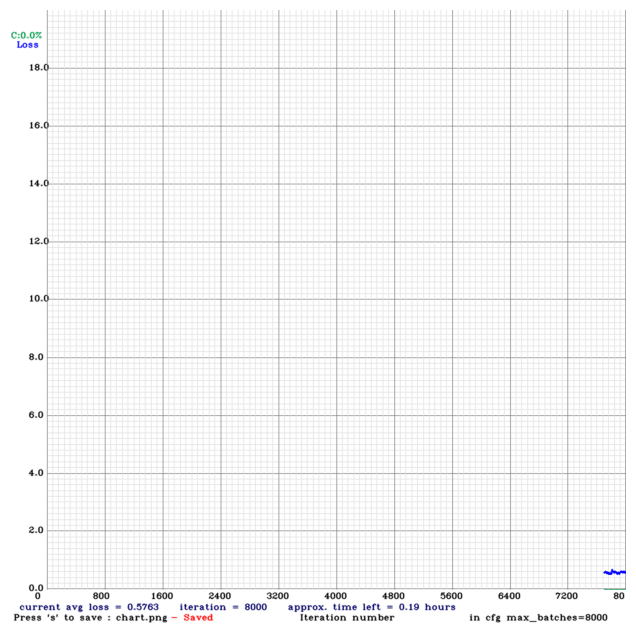

In [28]:
imShow('chart.png')

**TRICK**: If for some reason you get an error or your Colab goes idle during training, you have not lost your weights! Every 100 iterations a weights file called **yolov3_custom_last.weights** is saved to **mydrive/yolov3/backup/** folder (wherever your backup folder is). This is why we created this folder in our Google drive and not on the cloud VM. If your runtime crashes and your backup folder was in your cloud VM you would lose your weights and your training progress.

We can kick off training from our last saved weights file so that we don't have to restart! WOOHOO! Just run the following command but with your backup location.
```
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show
```

In [25]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/gw_localize_latest_5/backup/yolov3_custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 32289, rewritten_bbox = 0.003097 % 
]2;7926/8000: loss=0.6 hours left=0.3
 7926: 0.595997, 0.592555 avg loss, 0.000010 rate, 8.038141 seconds, 507264 images, 0.324412 hours left
Loaded: 0.000075 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.764291), count: 9, class_loss = 1.168699, iou_loss = 0.511045, total_loss = 1.679744 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.090018, iou_loss = 0.000000, total_loss = 0.090018 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.740390), count: 2, class_loss = 0.287476, iou_loss = 0.086852, total_loss = 0.374328 
 total_bbox = 32300, rewritten_bbox = 0.003096 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.768994), count: 5, class_loss = 0.252802, iou_loss = 0.271228, total_loss = 0.524030 
v3 (mse

## calculate mAP

In [26]:
# !./darknet detector map data/obj.data cfg/yolov3_custom.cfg /content/gdrive/MyDrive/gw_localize_latest_5/backup/yolov3_custom_1000.weights -dont_show -save_labels < data/test.txt > result_1k.txt  #  -iou_thresh 0.75 ## add after weights


# # ! ./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/localize_gw/backup/yolov3_custom_last-100.weights -dont_show -save_labels -thresh 0.55 < data/test.txt > results.txt

# # ! ./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/localize_gw/backup/yolov3_custom_last-400.weights -dont_show /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/GW_localize/test_data/200.png #-thresh 0.1

In [27]:
# /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/gw_localize_latest_5/backup
# /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/gw_localize_latest_5/backup
# /content/gdrive/MyDrive/gw_localize_latest_5/backup/yolov3_custom_last.weights